<a href="https://colab.research.google.com/github/AVIMARCUS6/DAV-5400/blob/master/A_Marcus_Titanic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Analysis: Scikit, Bokeh and xgboost

- Part 1: Introduction 
    - A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.
- Part 2: Data Summary 
    - Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc.
- Part 3: Exploratory Data Analysis (EDA) 
    - Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.
- Part 4: Inference 
    - Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings.
- Part 5: Conclusion 
    - A brief, concise narrative explaining your conclusions.
- Sources 
    - Be sure to include proper citations for any references you may have relied on as part of your work. 

### Library and Data Importing

In [0]:
# import libraries for analysis
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [0]:
# import train and test datasets
train = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/test.csv')

### Part 1: Introduction 

- A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

On April 10th, 1912 The Titanic began its voyage from Great Britian to New York. The ship was the first of its kind, claiming to be the safest and unsinkable as a result of the various safety measures put in place in order to cut off any sections that may flood. As we all know, this wasn't the case. At approximately 12:20 AM on April 15th the Titanic colided with an iceberg and began to sink. By 2:20 AM the Titanic was completely submerged beneath the Atlantic Ocean.

The ship was carrying approxamitaley 2,200, of those 1,300 were passangers. This study will delve into the survival and fatality of those aboard the ship.

This data will be used to highlight strong indicators of survival. This analysis will attempt to answer:
- What effect does cabin have on survival?
- if there is a relationship between age and fare?

***

### Part 2: Data Summary

- Source:
    - Data was acquired from Kaggle.com competition. It was uploaded to Github as a csv file and then imported into a Pandas DataFrame.
    - https://www.kaggle.com/c/titanic/data
   

- The data contains 891 rows and 12 columns. Each row of the data represents one passenger of the Titanic. The data is comprised of Quantitative Data (age, SibSp, Parch, fare) and Qualitative Data (Survived, Pclass, Sex, Cabin, Embarked). SibSp and Parch are discrete since they are recorded as whole integers and age and fare are continuous. Survived and sex are binary, Embarked is ordinal and Pclass and Cabin are ordinal.
- Use Cases:
    - The data is comprised of 891 rows therefore there are 891 use cases for the dataset.
- Attributes:
    - Each use case is comprised of 11 attributes

|Attribute|Description|
|---|---|
|Survival|Survival, 1=Yes,0=No|
|PassengerId|Unique Id of a passenger|
|Pclass|Ticket class, 1=1st,2=2nd,3=3rd|
|Sex|Sex, 1=Male,0=Female|
|Age|Age in years|
|SibSp|# of siblings and spouses aboard the Titanic|
|ParCh|# of parents and children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation|

- Note: As a result of data cleansing and wrangling the size of the data may change.

***

In [193]:
# view of original dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
#list data type for each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#round fare column to second decimal to represent dollars and cents
train['Fare'] = train['Fare'].round(2)

#### Data Cleaning:

In [0]:
# lists number of missing values for each column
def nas_sorted(df):
    return df.isnull().sum().sort_values(ascending = False)

In [0]:
# apply function to train dataset
sorted_nas = nas_sorted(train)

In [198]:
sorted_nas

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [199]:
# lists all unique values in Cabin column
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [200]:
train['Embarked'].value_counts()
#replace with 'S'
#replace age with mean '29.6'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# function that fills na of age column with mean value and fare column with median value
def na_filler(df, age_mean, fare_median):
    df['Cabin'].fillna('X',inplace=True)
    df['Age'].fillna(age_mean,inplace=True)
    df['Embarked'].fillna('S',inplace=True)
    df['Fare'].fillna(fare_median, inplace=True)

    return(df)

In [0]:
# define mean and median of age and fare column 
age_mean = train.Age.mean()
fare_median = train['Fare'].median()
# apply function to appropriate column of dataframe
train = na_filler(train,age_mean,fare_median)
test = na_filler(test,age_mean,fare_median)

In [203]:
nas_sorted(train)

Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [204]:
nas_sorted(test)

Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

Both the train and test data have had all missing data filled

***

#### Additional Columns:
- Source: https://www.kaggle.com/anaskad/step-by-step-solving-titanic-problem
    - Used source for reference(not copied as is)

In [0]:
def additional_columns(df_inp):
    
    # create copy of df
    df = df_inp.copy()
    
    ######################
    # Port
    # map 'S','C','Q' to 0,1,2 in new Port column
    df['Port'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    df.drop(columns=['Embarked'],inplace=True)
    
    ######################
    # Family size related variables
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    df['FamilySizeGroup'] = 'Small'
    df.loc[df['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
    df.loc[df['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'
    family_mapping = {"Small": 0, "Alone": 1, "Big": 2}
    df['FamilySizeGroup'] = df['FamilySizeGroup'].map(family_mapping)
    
    ######################
    # Title related variables
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)
    
    ######################
    # Gender variable
    # Map 'female' and 'male' to 1 and 0
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    ######################
    # Age variable
    # Create bins for Age variable
    df.loc[ df['Age'] <= 14, 'Age'] = 0
    df.loc[(df['Age'] > 14) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4
    
    ######################
    # Fare variable
    # Create bins for Fare variable
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
    
    ######################
    #rich child variable
    # Create new variable where child a rich is 0 and not child and rich or child and poor is 1
    df['IsChildandRich'] = 0
    df.loc[(df['Age'] <= 0) & (df['Pclass'] == 1 ),'IsChildandRich'] = 1  
    df.loc[(df['Age'] <= 0) & (df['Pclass'] == 2 ),'IsChildandRich'] = 1
    
    ######################
    # Cabin 
    # converts Cabin column to str format
    df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0])
    # replaces A,D,E,T Cabin with M for Medium, B,C with H for High and F,G with L for Low and X value for unknown Cabin
    df['Cabin'] = df['Cabin'].replace(['A', 'D', 'E', 'T'], 'M')
    df['Cabin'] = df['Cabin'].replace(['B', 'C'], 'H')
    df['Cabin'] = df['Cabin'].replace(['F', 'G'], 'L')
    # map L,M,H with 0,1,2 and convert to int
    df['Cabin'] = df['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int)
    
    return df

In [0]:
# apply additional_columns funtion to train and test datasets
train_feat = additional_columns(train)
test_feat = additional_columns(test)

In [207]:
# print list of new train columns
print(list(train_feat.columns))
print(list(test_feat.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Port', 'FamilySize', 'IsAlone', 'FamilySizeGroup', 'Title', 'IsChildandRich']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Port', 'FamilySize', 'IsAlone', 'FamilySizeGroup', 'Title', 'IsChildandRich']


Datasets contain all the same columns except for survived column.

***

### Part 3: EDA with Bokeh: 

In [0]:
# import bokeh libraries
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues8

output_notebook()

In [0]:
# create copy of original dataset with new columns for bokeh visualization
bokeh_df = train_feat.copy()

In [0]:
# create copy of original dataset before adding new columns
orig_df = train.copy()

#### Descriptive Statistics:

In [211]:
bokeh_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Port,FamilySize,IsAlone,FamilySizeGroup,Title,IsChildandRich
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,1.316498,0.523008,0.381594,1.497194,0.557800,0.361392,1.904602,0.602694,0.741863,1.728395,0.026936
std,257.353842,0.486592,0.836071,0.477990,0.786649,1.102743,0.806057,1.118156,1.069376,0.635673,1.613459,0.489615,0.575364,1.030039,0.161987
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,3.000000,3.000000,2.000000,11.000000,1.000000,2.000000,5.000000,1.000000


In [0]:
# create group dataframe with only Survived, Sex and PassengerId columns
group = bokeh_df[['Survived','Sex','PassengerId']]

***

In [0]:
survivors_orig = orig_df['Survived'] == 1
orig_survivors = orig_df[survivors_orig]

dead_orig = orig_df['Survived'] == 0
orig_dead = orig_df[dead_orig]

In [214]:
orig_survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.549778,0.473684,0.464912,48.395439
std,252.358840,0.0,0.863321,13.772498,0.708688,0.771712,66.597078
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.480000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.330000


#### Survived

In [215]:
#group by survivors
bokeh_surv_count = bokeh_df.groupby('Survived').count().reset_index()
#bokeh_surv_count

source=ColumnDataSource(bokeh_surv_count)

survive_list = source.data['Survived'].tolist()
#survive_list

# Convert int values in cabin_list to str 
survive_list = list(map(str, survive_list))
#survive_list

survive_passenger_count = source.data['PassengerId'].tolist()
#survive_passenger_count

from bokeh.palettes import Spectral6

source = ColumnDataSource(data=dict(classes=survive_list, counts=survive_passenger_count, color=Spectral6))

p = figure(x_range=survive_list, plot_height=300, toolbar_location=None, title="Survivor Counts")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 600

show(p)

Analysis: Out of the 891 passengers recorded in this dataset only 342 survived (1). Indicating that only 38% of the passengers survived.

***

In [0]:
#filter bokeh_df for only survivors
survivors = bokeh_df['Survived'] == 1
bokeh_survivors = bokeh_df[survivors]

In [0]:
#drop survived column
bokeh_survivors = bokeh_survivors.drop(['Survived'], axis = 1)

***

In [0]:
#filter train dataframe for only survivors
train_survivors = train['Survived'] == 1
train_survivors = train[survivors]

In [0]:
#drop survived column
train_survivors = train_survivors.drop(['Survived'], axis = 1)

***

#### Pclass

In [0]:
class_df = train.copy()

In [0]:
from bokeh.models import HoverTool
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap

In [222]:
class_df = train.copy()

class_df[['Survived','Pclass']] = class_df[['Survived','Pclass']].astype(str)

class_group = class_df.groupby(by=['Pclass','Survived'])

source = ColumnDataSource(class_group)
index_cmap = factor_cmap('Pclass_Survived', palette=Spectral5, factors=sorted(class_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=400, x_range=class_group, toolbar_location=None, title="Passenger Survival By Class")
p.vbar(x='Pclass_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Class Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: Class 3 had the most deaths and the second most survivors while class 1 had the most Survivors and the least amount of deaths.

***

##### Class Survived:

In [223]:
#group survivors by Class
bokeh_surv_class = bokeh_survivors.groupby(['Pclass'])['PassengerId'].count().reset_index()
bokeh_surv_class

,Pclass,PassengerId
0,1,136
1,2,87
2,3,119


In [0]:
source=ColumnDataSource(bokeh_surv_class)

In [225]:
# convert cabin column from dataframe to list
class_list = source.data['Pclass'].tolist()
class_list

[1, 2, 3]

In [226]:
# Convert int values in cabin_list to str 
class_list = list(map(str, class_list))
class_list

['1', '2', '3']

In [227]:
# convert count column from data to list
class_passenger_count = source.data['PassengerId'].tolist()
class_passenger_count

[136, 87, 119]

In [228]:
from bokeh.palettes import Spectral6

source = ColumnDataSource(data=dict(classes=class_list, counts=class_passenger_count, color=Spectral6))

p = figure(x_range=class_list, plot_height=300, toolbar_location=None, title="Class Counts")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 200


show(p)

Analysis: Out of those that survived, majority came from the Lower Class, Class 1 and the least number of passengers came from the middle class, class 2.

***

#### Cabin

In [229]:
cabin_df = bokeh_df.copy()

cabin_df[['Survived','Cabin']] = cabin_df[['Survived','Cabin']].astype(str)

cabin_group = cabin_df.groupby(by=['Cabin','Survived'])

source = ColumnDataSource(cabin_group)
index_cmap = factor_cmap('Cabin_Survived', palette=Spectral5, factors=sorted(cabin_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=500, x_range=cabin_group, toolbar_location=None, title="Passenger Survival By Cabin")
p.vbar(x='Cabin_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Cabins Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: Cabin 0 had the most deaths and surivors. This could be the result of missing data, since passengers with missing Cabins where store in Cabin 0.

***

##### Cabin Survived:

In [230]:
#group survivors by cabin
bokeh_surv_cab = bokeh_survivors.groupby('Cabin').count().reset_index()
bokeh_surv_cab

,Cabin,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Port,FamilySize,IsAlone,FamilySizeGroup,Title,IsChildandRich
0,0,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206
1,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,2,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
3,3,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70


In [0]:
source=ColumnDataSource(bokeh_surv_cab)

In [232]:
# convert cabin column to list
cabin_list = source.data['Cabin'].tolist()
cabin_list

[0, 1, 2, 3]

In [233]:
# Convert int values in cabin_list to str 
cabin_list = list(map(str, cabin_list))
cabin_list

['0', '1', '2', '3']

In [234]:
# convert count column to list
passenger_count = source.data['PassengerId'].tolist()
passenger_count

[206, 10, 56, 70]

In [235]:
from bokeh.palettes import Spectral4

source = ColumnDataSource(data=dict(cabin=cabin_list, counts=passenger_count, legend=legend_cabin, color=Spectral4))

p = figure(x_range=cabin_list, plot_height=300, toolbar_location=None, title="Cabin Counts")
p.vbar(x='cabin', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 250

show(p)

Analysis: This bar plot shows that for a large majority of surviving passengers it is unclear which cabin they belonged to.

***

#### Sex:

In [236]:
sex_df = train.copy()

sex_df[['Survived','Sex']] = sex_df[['Survived','Sex']].astype(str)

sex_group = sex_df.groupby(by=['Sex','Survived'])

source = ColumnDataSource(sex_group)
index_cmap = factor_cmap('Sex_Survived', palette=Spectral5, factors=sorted(sex_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=500, x_range=sex_group, toolbar_location=None, title="Passenger Survival By Sex")
p.vbar(x='Sex_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Sex Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: The majority of surivors where women and the majority of casualties where men. 

***

##### Sex Survived:

In [237]:
#group survivors by Class
bokeh_surv_sex = train_survivors.groupby('Sex').count().reset_index()
bokeh_surv_sex

,Sex,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,233,233,233,233,233,233,233,233,233,233
1,male,109,109,109,109,109,109,109,109,109,109


In [0]:
source=ColumnDataSource(bokeh_surv_sex)

In [239]:
sex_list = source.data['Sex'].tolist()
sex_list

['female', 'male']

In [240]:
# Convert int values in cabin_list to str 
sex_list = list(map(str, sex_list))
sex_list

['female', 'male']

In [241]:
sex_passenger_count = source.data['PassengerId'].tolist()
sex_passenger_count

[233, 109]

In [242]:
from bokeh.palettes import Spectral5

source = ColumnDataSource(data=dict(classes=sex_list, counts=sex_passenger_count, color=Spectral5))

p = figure(x_range=sex_list, plot_height=300, toolbar_location=None, title="Survivors Count by Sex")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 200


show(p)

Analysis: The bar chart indicates that most of the survivors of the Titanic were female.

***

#### SibSp:

In [243]:
sib_df = train.copy()

sib_df[['Survived','SibSp']] = sib_df[['Survived','SibSp']].astype(str)

sib_group = sib_df.groupby(by=['SibSp','Survived'])

source = ColumnDataSource(sib_group)
index_cmap = factor_cmap('SibSp_Survived', palette=Spectral5, factors=sorted(sib_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=500, x_range=sib_group, toolbar_location=None, title="Passenger Survival By SibSp")
p.vbar(x='SibSp_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "SibSp Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: Most passengers had 0 siblings or spouses on board with them.

***

##### SibSp Survived:

In [244]:
#group survivors by Class
bokeh_surv_sibs = bokeh_survivors.groupby('SibSp').count().reset_index()
bokeh_surv_sibs

,SibSp,PassengerId,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Port,FamilySize,IsAlone,FamilySizeGroup,Title,IsChildandRich
0,0,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
1,1,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
2,2,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [0]:
source=ColumnDataSource(bokeh_surv_sibs)

In [246]:
sib_list = source.data['SibSp'].tolist()
sib_list

[0, 1, 2, 3, 4]

In [247]:
# Convert int values in cabin_list to str 
sib_list = list(map(str, sib_list))
sib_list

['0', '1', '2', '3', '4']

In [248]:
sib_passenger_count = source.data['PassengerId'].tolist()
sib_passenger_count

[210, 112, 13, 4, 3]

In [249]:
from bokeh.palettes import Spectral5

source = ColumnDataSource(data=dict(classes=sib_list, counts=sib_passenger_count, color=Spectral5))

p = figure(x_range=sib_list, plot_height=300, toolbar_location=None, title="Survivors Count by SibSp Group")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 250


show(p)

Analysis: Based on the bar chart of number of passengers with x amount of siblings or spouses, the majority of passengers either did not have any siblings or spouses or had at least one. Perhaps this can mean that most passengers were either couples or only childs. In addition perhaps those passengers with one sibling or spouse had a higher chance of survival as well.

***

#### Age:

In [0]:
arr_hist, edges = np.histogram(orig_survivors['Age'], 
                               bins = int(80/4), 
                               range = [0, 80])
# Put the information in a dataframe
ages = pd.DataFrame({'Age': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [0]:
#ages

In [252]:
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Survival Passenger Ages',
          x_axis_label = 'Ages (min)', 
           y_axis_label = 'Number of Passengers')

# Add a quad glyph
p.quad(bottom=0, top=ages['Age'], 
       left=ages['left'], right=ages['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

Analysis: The histogram seems to show a normal distribution of age among passengers with the mean age of approximately 30, maximum age of 80 and minimum age of 0. The younger ages seem to hike up a little and then fall indicating the high number of children aboard that survived.

***

##### Age groups of Survivors:

In [0]:
#group survivors by Class
bokeh_surv_age = bokeh_survivors.groupby('Age').count().reset_index()

In [0]:
source=ColumnDataSource(bokeh_surv_age)

In [255]:
age_list = source.data['Age'].tolist()
age_list

[0.0, 1.0, 2.0, 3.0, 4.0]

In [256]:
# Convert int values in cabin_list to str 
age_list = list(map(str, age_list))
age_list

['0.0', '1.0', '2.0', '3.0', '4.0']

In [257]:
age_passenger_count = source.data['PassengerId'].tolist()
age_passenger_count

[45, 190, 76, 30, 1]

In [258]:
from bokeh.palettes import Spectral5
legend_age = ['<14', '<32','<48', '<64', '>64']

source = ColumnDataSource(data=dict(classes=age_list, counts=age_passenger_count, legend=legend_age, color=Spectral5))

p = figure(x_range=age_list, plot_height=300, toolbar_location=None, title="Survivors Count by Age Group")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 250


show(p)

Analysis: As deduced from the histogram, the majority of passengers who survived the shipwreck where 14-32 years old.

***

#### Parch:

In [259]:
parch_df = train.copy()

parch_df[['Survived','Parch']] = parch_df[['Survived','Parch']].astype(str)

parch_group = parch_df.groupby(by=['Parch','Survived'])

source = ColumnDataSource(parch_group)
index_cmap = factor_cmap('Parch_Survived', palette=Spectral5, factors=sorted(parch_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=500, x_range=parch_group, toolbar_location=None, title="Passenger Survival By SibSp")
p.vbar(x='Parch_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Parch Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: Passengers with no Parent or Child had the highest death rate as well as survival. This was most likely do to the fact that most passengers either came with out parents or children.

***

##### Parch Survived:

In [260]:
#group survivors by Parch
bokeh_surv_parch = bokeh_survivors.groupby('Parch').count().reset_index()
#bokeh_surv_parch

source=ColumnDataSource(bokeh_surv_parch)

parch_list = source.data['Parch'].tolist()
#Parch_list

# Convert int values in cabin_list to str 
parch_list = list(map(str, parch_list))
#Parch_list

parch_passenger_count = source.data['PassengerId'].tolist()
#Parch_passenger_count

from bokeh.palettes import Spectral6


source = ColumnDataSource(data=dict(classes=parch_list, counts=parch_passenger_count, color=Spectral5))

p = figure(x_range=parch_list, plot_height=300, toolbar_location=None, title="Survivors Count by Age Group")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 250


show(p)

Analysis: Based on this bar graph, majority of survivors were not accompanied by any parents or children.

***

#### Fare:

In [0]:
arr_hist, edges = np.histogram(orig_survivors['Fare'], 
                               bins = int(512.33/25), 
                               range = [0, 512.33])
# Put the information in a dataframe
fares = pd.DataFrame({'Fare': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [262]:
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Survival Passenger Ages',
          x_axis_label = 'Fares (min)', 
           y_axis_label = 'Number of Passengers')

# Add a quad glyph
p.quad(bottom=0, top=fares['Fare'], 
       left=fares['left'], right=fares['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

Analysis: The fare distribution appears to be a normal distribution skewed right. Most Passsengers paid lower fare rates.

***

#### Port:

In [263]:
port_df = train.copy()

port_df[['Survived','Embarked']] = port_df[['Survived','Embarked']].astype(str)

port_group = port_df.groupby(by=['Embarked','Survived'])

source = ColumnDataSource(port_group)
index_cmap = factor_cmap('Embarked_Survived', palette=Spectral5, factors=sorted(port_df.Survived.unique()), start=1,end=2)

p = figure(plot_width=900, plot_height=500, x_range=port_group, toolbar_location=None, title="Passenger Survival By Port")
p.vbar(x='Embarked_Survived', top='PassengerId_count', width=1, line_color="white", source=source, fill_color=index_cmap)
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Port Grouped By Survival Status"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

Analysis: The Majority of passengers embarked from Port S. Port S also had the most survivors and casualties.

##### Port Survived:

In [264]:
#group survivors by Port
bokeh_surv_port = bokeh_survivors.groupby('Port').count().reset_index()
#bokeh_surv_port

source=ColumnDataSource(bokeh_surv_port)

port_list = source.data['Port'].tolist()
#Port_list

# Convert int values in cabin_list to str 
port_list = list(map(str, port_list))
#Port_list

port_passenger_count = source.data['PassengerId'].tolist()
#Port_passenger_count

from bokeh.palettes import Spectral6

source = ColumnDataSource(data=dict(classes=port_list, counts=port_passenger_count, color=Spectral4))

p = figure(x_range=port_list, plot_height=300, toolbar_location=None, title="Survivors Count by Port")
p.vbar(x='classes', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 250


show(p)

Analysis: Majority of survivors embarked from port S.

***

### Part 4: Logistic Regression

In [265]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.transform import factor_cmap, factor_mark

scat = train.copy()
scat[['Survived']] = scat[['Survived']].astype(str)

# Store the data in a ColumnDataSource
scatter_source = ColumnDataSource(scat)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']


SURVIVED = ['0','1']
MARKERS = ['circle_x', 'triangle']

# Create the figure
fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='Age',
             y_axis_label='Fare',
             title='Age vs. Fare By Survive Status',
             toolbar_location='below',
             tools=select_tools)

# Format the y-axis tick labels as percentages
fig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

# Add square representing each player
fig.scatter(x='Age',
           y='Fare',
           source=scatter_source,
            legend='Survived',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3,
            marker=factor_mark('Survived', MARKERS, SURVIVED),
            color=factor_cmap('Survived', 'Category10_3', SURVIVED))

# Visualize
show(fig)

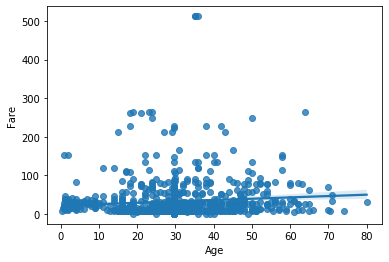

In [266]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="Age", y="Fare", data=scat)

Analysis: There appears to be a very weak positive relationship between between Age and Fare.

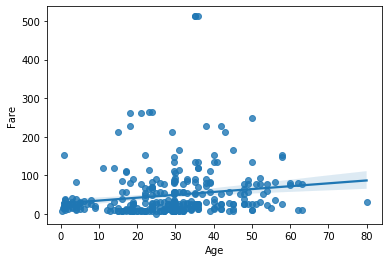

In [267]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="Age", y="Fare", data=orig_survivors)

Analysis: Although there appears to be a weak relationship between Age and Fare of all passengers, there appears to be stronger relationship among the age of surviving passengers and fare. 

In [0]:
# remove non essential columns and survived column to create independent variable dataframe
ind_vars = list(set(train_feat.columns) - set(['Survived','PassengerId','Name','Ticket']))
ind_vars.sort()

In [0]:
# set train variable with independent variables
x = train_feat[ind_vars].values

# set y variable to survive
y = train_feat.Survived.values

In [270]:
from sklearn.linear_model import LogisticRegression

# initialize logistic regression
logreg = LogisticRegression() #(C=0.1, penalty='l1', tol=1e-6)

# fit model
logreg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict
pred_test_logistic = logreg.predict(train_feat[ind_vars])

In [272]:
#accuracy
result_train = logreg.score(x, y)
print(result_train)

0.8170594837261503


**Result:** The logistic regression model is 81.7% accurate in predicting passenger survival.

***

### Part 5: Xgboost

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [0]:
# creating dummy variables
train_dummy = train_feat[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Port','FamilySizeGroup','IsAlone','IsChildandRich']]

In [0]:
test_dummy = test_feat[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Port','FamilySizeGroup','IsAlone','IsChildandRich']]

In [0]:
train_dummy = pd.get_dummies(train_dummy, drop_first=True)

In [0]:
test_dummy = pd.get_dummies(test_dummy, drop_first=True)

In [0]:
X = np.array(train_dummy.drop(['Survived'], 1))
training_features = np.array(train_dummy.drop(['Survived'], 1).columns)
#X = preprocessing.scale(X)  --- not needed for XGboost?
y = np.array(train_dummy['Survived'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [280]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [281]:
cv_results = cross_validate(model, X_train, y_train)
cv_results['test_score']

array([0.81118881, 0.83916084, 0.82394366, 0.78169014, 0.85211268])

In [282]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8379888268156425


**Result:** Xgboost has improved the accuracy score of our model from 81.7% to 84%.

### Part 5: Conclusion

In conclusion one can predict the survival of passengers on the titanic with an 84% accuracy score. Therefore it would be advisible to use these variables in order to determine passenger survival of the Titanic.

### Sources:



- Bar Charts:
  - https://github.com/bokeh/bokeh/blob/master/examples/howto/Categorical%20Data.ipynb

  - https://realpython.com/python-data-visualization-bokeh/

  - https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html
  - https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

- Scatter Plot:
  - https://stackoverflow.com/questions/51144743/make-the-colour-and-marker-of-bokeh-plot-scatter-points-dependent-on-dataframe-v

- Xgboost:
  - https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

  - https://www.kaggle.com/ihopethiswillfi/titanic-survival-prediction-in-python-with-xgboost

  - http://andrewtrick.com/titanic%20revisited.html